In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
X, y = np.array(df['YearBuilt']), np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1022,) (438,)
(1022,) (438,)


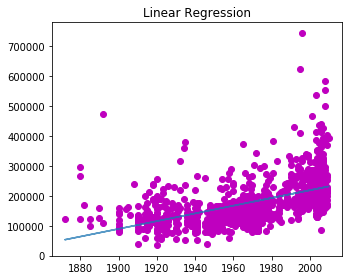

In [4]:
def linear_regression(x, y):
    """Simple Linear Regression : One dimension only."""
    # covariance
    N = len(x)
    c_xy = np.sum(((x - np.mean(x)) * (y - np.mean(y))) / N)
    b = c_xy / np.var(x)
    a = np.mean(y) - (b * np.mean(x))
    return a + (b * x)

def linear_regression_mul(x, y):
    """Multivariate Linear Regression : Multidimensional."""
    x = np.array(x)
    m, c = np.linalg.lstsq(x, y, rcond=-1)[0]
    return m, c, np.dot(x, m)

# e = linear_regression_mul(X_train, y_train)

A = np.vstack([X_train, np.ones(len(X_train))]).T
m, c, pred = linear_regression_mul(A, y_train)
e = c + (X_train * m)

plt.figure(figsize=(5, 4))
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.75)
plt.tight_layout()
plt.show()

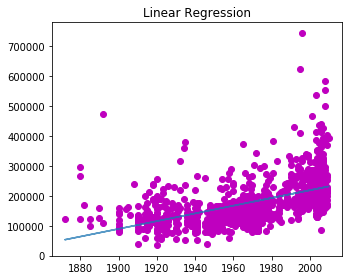

In [5]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
reg = LinearRegression().fit(A, y_train)
e_sk_value = (reg.coef_ * A) + reg.intercept_

plt.figure(figsize=(5, 4))
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e_sk_value[:, 0], alpha=.75)
plt.tight_layout()
plt.show()